In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd
import mglearn
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
print("Keys of iris_dataset:\n{}".format(iris_dataset.keys()))

Keys of iris_dataset:
dict_keys(['feature_names', 'target', 'target_names', 'data', 'DESCR'])


In [5]:
print(iris_dataset['DESCR'][:193]+"\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [6]:
print("Target names:{}".format(iris_dataset['target_names']))

Target names:['setosa' 'versicolor' 'virginica']


In [7]:
print("Feature names:{}".format(iris_dataset['feature_names']))

Feature names:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print("Type of data:{}".format(type(iris_dataset['data'])))

Type of data:<class 'numpy.ndarray'>


In [9]:
print("Shape of data:{}".format(iris_dataset['data'].shape))

Shape of data:(150, 4)


In [10]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [11]:
print("Type of target:{}".format(type(iris_dataset['target'])))

Type of target:<class 'numpy.ndarray'>


In [12]:
print("Shape of target:{}".format(iris_dataset['target'].shape))

Shape of target:(150,)


In [13]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [15]:
print("X_train shape:{}".format(X_train.shape))
print("y_train shape:{}".format(y_train.shape))

X_train shape:(112, 4)
y_train shape:(112,)


In [16]:
print("X_test shape:{}".format(X_test.shape))
print("y_test shape:{}".format(y_test.shape))

X_test shape:(38, 4)
y_test shape:(38,)


In [17]:
#create pandas dataframe from X_train using feature_names as column labels
iris_dataframe = pd.DataFrame(X_train,columns=iris_dataset.feature_names)

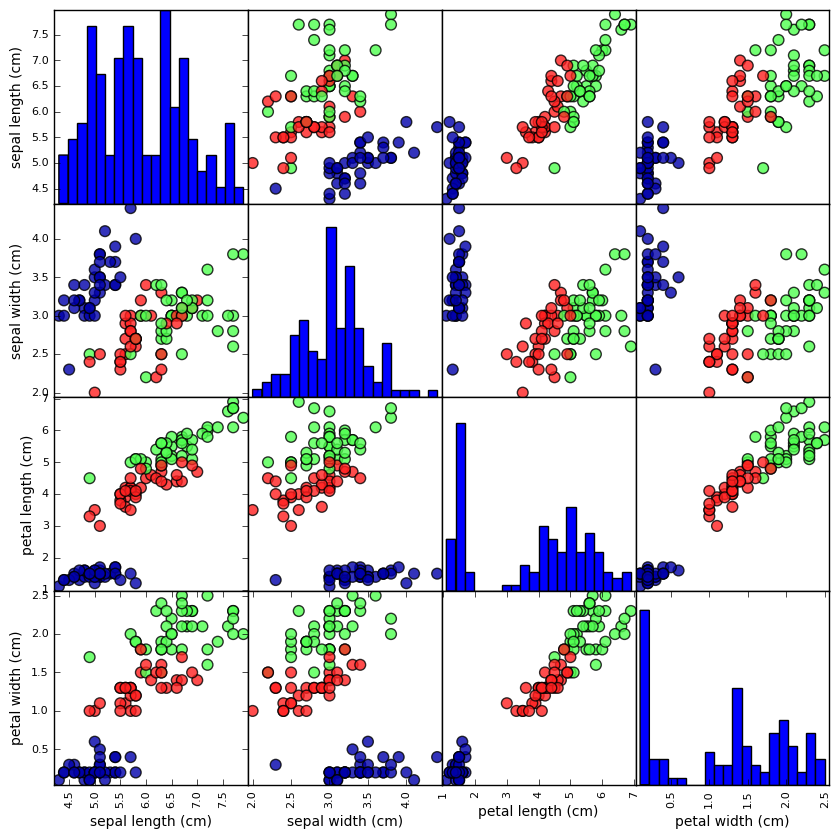

In [18]:
grr = pd.scatter_matrix(iris_dataframe,
                        c=y_train, figsize=(10, 10), marker='o', hist_kwds={'bins': 20}, 
                        s=60, alpha=.8, cmap=mglearn.cm3)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [21]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:{}".format(X_new.shape))

X_new.shape:(1, 4)


In [22]:
prediction = knn.predict(X_new)
print("Prediction:{}".format(prediction))
print("Predicted target name:{}".format(iris_dataset['target_names'][prediction]))

Prediction:[0]
Predicted target name:['setosa']


In [23]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred))

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [24]:
print("Test set score:{:.2f}".format(np.mean(y_pred == y_test)))

Test set score:0.97


In [25]:
print("Test set score using score method:{:.2f}".format(knn.score(X_test,y_test)))

Test set score using score method:0.97


### Summary of code needed to run knn on the iris dataset

In [27]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score:{:.2f}".format(knn.score(X_test,y_test)))

Test set score:0.97
